In [1]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/harshit3610/TataSteelsTraining/main/loan_data_set.csv")

In [2]:
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
1,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
2,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
3,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
4,5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,609,LP002933,Female,No,0,Graduate,No,2900,0.0,71,360,1,Rural,Y
500,610,LP002934,Male,Yes,3,Graduate,No,4106,0.0,40,180,1,Rural,Y
501,611,LP002935,Male,Yes,1,Graduate,No,8072,240.0,253,360,1,Urban,Y
502,612,LP002936,Male,Yes,2,Graduate,No,7583,0.0,187,360,1,Urban,Y


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['ApplicantIncome']])
df['ApplicantIncome']=pd.DataFrame( scaler.transform(df[['ApplicantIncome']]) )
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Male,Yes,1,Graduate,No,-0.140085,1508.0,128,360,1,Rural,N
1,2,LP001005,Male,Yes,0,Graduate,Yes,-0.424158,0.0,66,360,1,Urban,Y
2,3,LP001006,Male,Yes,0,Not Graduate,No,-0.498989,2358.0,120,360,1,Urban,Y
3,4,LP001008,Male,No,0,Graduate,No,0.114198,0.0,141,360,1,Urban,Y
4,5,LP001011,Male,Yes,2,Graduate,Yes,0.009578,4196.0,267,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,609,LP002933,Female,No,0,Graduate,No,-0.442103,0.0,71,360,1,Rural,Y
500,610,LP002934,Male,Yes,3,Graduate,No,-0.225684,0.0,40,180,1,Rural,Y
501,611,LP002935,Male,Yes,1,Graduate,No,0.486023,240.0,253,360,1,Urban,Y
502,612,LP002936,Male,Yes,2,Graduate,No,0.398271,0.0,187,360,1,Urban,Y


In [4]:
df.isna().sum()

Unnamed: 0           0
Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
df['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
df.replace({'Yes':1,'No':0},inplace=True)
df['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [6]:
df

,Unnamed: 0,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,LP001003,Male,1,1,1,0,-0.140085,1508.0,128,360,1,Rural,0
1,2,LP001005,Male,1,0,1,1,-0.424158,0.0,66,360,1,Urban,1
2,3,LP001006,Male,1,0,0,0,-0.498989,2358.0,120,360,1,Urban,1
3,4,LP001008,Male,0,0,1,0,0.114198,0.0,141,360,1,Urban,1
4,5,LP001011,Male,1,2,1,1,0.009578,4196.0,267,360,1,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,609,LP002933,Female,0,0,1,0,-0.442103,0.0,71,360,1,Rural,1
500,610,LP002934,Male,1,3,1,0,-0.225684,0.0,40,180,1,Rural,1
501,611,LP002935,Male,1,1,1,0,0.486023,240.0,253,360,1,Urban,1
502,612,LP002936,Male,1,2,1,0,0.398271,0.0,187,360,1,Urban,1


In [7]:
features=df[['Married','Education','Self_Employed']]
target=df[['Loan_Status']]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=10)    

In [9]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [10]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.6296296296296297

In [11]:
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.6296296296296297

In [12]:
y_test.reset_index(drop=True,inplace=True)

In [13]:
predicted = pd.DataFrame(model.predict(x_test),columns=['Predicted Value'])

In [14]:
pd.concat([predicted,y_test],axis=1)

,Predicted Value,Loan_Status
0,1,0
1,1,1
2,1,1
3,1,0
4,1,1
...,...,...
121,1,0
122,1,0
123,1,1
124,1,0


In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(predicted,y_test)

0.6349206349206349

In [16]:
ans=pd.concat([predicted,y_test],ignore_index=True,axis=1)

ans.rename(columns={0:'Predicted',1:'Actual'},inplace=True)

Empty DataFrame
Columns: []
Index: [(0, 1), (1, 0), (1, 1)]

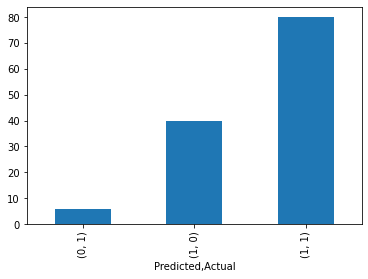

In [17]:
temp=ans.groupby([x for x in ans.columns])
temp.size().plot.bar()
temp.sum()

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(predicted, y_test)

array([[ 0,  6],
       [40, 80]], dtype=int64)

In [19]:
from sklearn.metrics import f1_score

f1_score(predicted,y_test)

0.7766990291262136